# SINDy-SHRED Tutorial on Sea Surface Temperature (SHRED V1)

In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import Libraries

In [71]:
# PYSHRED
from pyshred import DataManager, SHRED, SHREDEngine, SINDy_Forecaster

# Other helper libraries
import matplotlib.pyplot as plt
from scipy.io import loadmat
import torch
import numpy as np

#### Load in SST Data

In [72]:
mat = loadmat("SST_data.mat")
sst_data = mat['Z'].T
sst_data = sst_data.reshape(1400, 180, 360)
sst_data.shape

(1400, 180, 360)

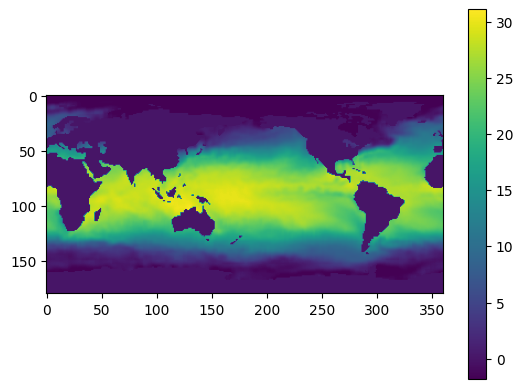

In [73]:
# Plotting a single frame
plt.figure()
plt.imshow(sst_data[0]) 
plt.colorbar()
plt.show()

#### Initialize Data Manager

In [74]:
manager = DataManager(
    lags = 52,
    train_size = 0.8,
    val_size = 0.1,
    test_size = 0.1,
)

#### Add datasets and sensors

In [75]:
manager.add_data(
    data = sst_data,
    id = "SST",
    random = 50,
    # mobile=,
    # stationary=,
    # measurements=,
    compress=False,
)

#### Analyze sensor summary

In [76]:
manager.sensor_summary_df

,data id,number,type,loc/traj
0,SST,0,stationary (random),"(91, 245)"
1,SST,1,stationary (random),"(80, 43)"
2,SST,2,stationary (random),"(141, 167)"
3,SST,3,stationary (random),"(0, 32)"
4,SST,4,stationary (random),"(102, 99)"
5,SST,5,stationary (random),"(150, 30)"
6,SST,6,stationary (random),"(67, 50)"
7,SST,7,stationary (random),"(149, 206)"
8,SST,8,stationary (random),"(37, 250)"
9,SST,9,stationary (random),"(28, 31)"


In [77]:
manager.sensor_measurements_df

data id,SST-0,SST-1,SST-2,SST-3,SST-4,SST-5,SST-6,SST-7,SST-8,SST-9,...,SST-40,SST-41,SST-42,SST-43,SST-44,SST-45,SST-46,SST-47,SST-48,SST-49
0,23.679999,0.0,9.47,-1.8,27.479999,0.72,0.0,1.66,0.0,0.0,...,18.06,23.369999,0.0,28.779999,-1.8,24.979999,28.679999,14.60,29.139999,22.909999
1,24.049999,0.0,9.92,-1.8,27.259999,1.26,0.0,1.78,0.0,0.0,...,18.74,23.589999,0.0,28.689999,-1.8,24.929999,29.119999,14.27,28.789999,22.579999
2,24.219999,0.0,9.88,-1.8,27.479999,1.58,0.0,2.20,0.0,-0.0,...,19.08,23.139999,0.0,28.799999,-1.8,24.939999,29.069999,14.10,28.959999,22.899999
3,24.449999,0.0,10.01,-1.8,27.719999,1.60,0.0,2.20,0.0,-0.0,...,19.87,22.969999,0.0,28.479999,-1.8,25.329999,29.679999,15.22,27.989999,22.120000
4,24.839999,0.0,10.54,-1.8,27.679999,1.55,0.0,2.22,0.0,-0.0,...,19.58,23.129999,0.0,28.659999,-1.8,25.429999,29.499999,15.25,28.069999,22.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,22.919999,0.0,7.70,-1.8,27.389999,-1.46,0.0,-0.64,0.0,0.0,...,14.10,28.239999,0.0,29.469999,-1.8,24.349999,25.289999,12.54,28.699999,18.890000
1396,22.689999,0.0,8.08,-1.8,27.109999,-1.50,0.0,-0.64,0.0,0.0,...,14.16,28.139999,0.0,29.449999,-1.8,23.869999,26.089999,12.36,29.279999,19.120000
1397,22.409999,0.0,8.22,-1.8,27.249999,-1.57,0.0,-0.35,0.0,0.0,...,14.97,27.849999,0.0,29.199999,-1.8,24.609999,26.109999,12.45,29.039999,19.110000
1398,22.280000,0.0,8.35,-1.8,27.799999,-1.53,0.0,-0.32,0.0,0.0,...,15.29,27.449999,0.0,29.209999,-1.8,24.629999,26.359999,12.02,29.189999,18.840000


#### Get train, validation, and test set

In [78]:
train_dataset, val_dataset, test_dataset= manager.prepare()

#### Initialize a latent forecaster

In [79]:
latent_forecaster = SINDy_Forecaster(poly_order=1, include_sine=True, dt=1/5)

#### Initialize SHRED

In [80]:
shred = SHRED(sequence_model="GRU", decoder_model="SDN", latent_forecaster=latent_forecaster)

#### Fit SHRED

In [81]:
val_errors = shred.fit(train_dataset=train_dataset, val_dataset=val_dataset, num_epochs=50, thres_epoch=20, sindy_regularization=1)
print('val_errors:', val_errors)

Fitting SindySHRED...
Epoch 1: Average training loss = 0.104710
Validation MSE (epoch 1): 0.031707
Epoch 2: Average training loss = 0.036889
Validation MSE (epoch 2): 0.013306
Epoch 3: Average training loss = 0.023191
Validation MSE (epoch 3): 0.012438
Epoch 4: Average training loss = 0.020190
Validation MSE (epoch 4): 0.011489
Epoch 5: Average training loss = 0.019589
Validation MSE (epoch 5): 0.011404
Epoch 6: Average training loss = 0.018494
Validation MSE (epoch 6): 0.011311
Epoch 7: Average training loss = 0.017871
Validation MSE (epoch 7): 0.010767
Epoch 8: Average training loss = 0.017201
Validation MSE (epoch 8): 0.010279
Epoch 9: Average training loss = 0.016896
Validation MSE (epoch 9): 0.010002
Epoch 10: Average training loss = 0.016435
Validation MSE (epoch 10): 0.009861
Epoch 11: Average training loss = 0.016079
Validation MSE (epoch 11): 0.009757
Epoch 12: Average training loss = 0.015954
Validation MSE (epoch 12): 0.009661
Epoch 13: Average training loss = 0.015611
Valid

#### Evaluate SHRED

In [82]:
train_mse = shred.evaluate(dataset=train_dataset)
val_mse = shred.evaluate(dataset=val_dataset)
test_mse = shred.evaluate(dataset=test_dataset)
print(f"Train MSE: {train_mse:.3f}")
print(f"Val   MSE: {val_mse:.3f}")
print(f"Test  MSE: {test_mse:.3f}")

Train MSE: 0.007
Val   MSE: 0.009
Test  MSE: 0.015


#### SINDy Discovered Latent Dynamics

In [83]:
shred.latent_forecaster.model.print()

(x0)' = 0.183 1 + 0.140 x0 + -0.109 x1 + -0.639 x2
(x1)' = 0.149 1 + 0.318 x0 + 0.021 x1 + -0.442 x2
(x2)' = 0.088 1 + 0.351 x0 + 0.117 x1 + -0.168 x2


#### Initialize SHRED Engine for Downstream Tasks

In [84]:
engine = SHREDEngine(manager, shred)

#### Sensor Measurements to Latent Space

In [85]:
test_latent_from_sensors = engine.sensor_to_latent(manager.test_sensor_measurements)

#### Forecast Latent Space (No Sensor Measurements)

In [86]:
val_latents = engine.sensor_to_latent(manager.val_sensor_measurements)
init_latents = val_latents[-1] # seed forecaster with final latent space from val
t = len(manager.test_sensor_measurements)
test_latent_from_forecaster = engine.forecast_latent(t=t, init_latents=init_latents)

#### Decode Latent Space to Full-State Space

In [87]:
test_prediction = engine.decode(test_latent_from_sensors) # latent space generated from sensor data
test_forecast = engine.decode(test_latent_from_forecaster) # latent space generated from latent forecasted (no sensor data)

Compare final frame in prediction and forecast to ground truth:

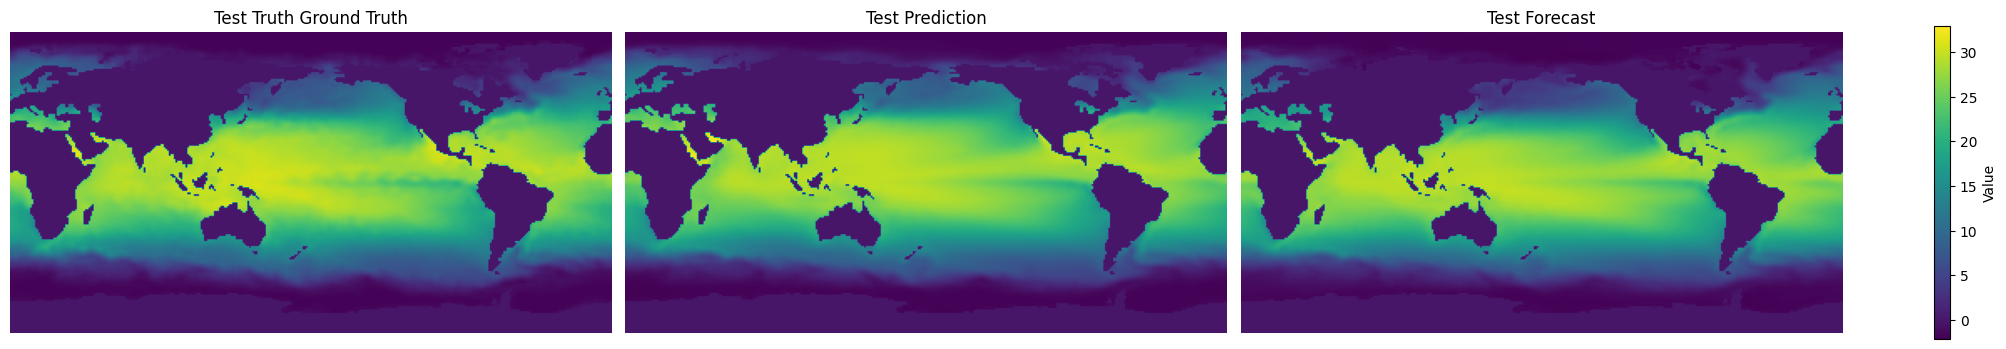

In [88]:
truth      = sst_data[-1]
prediction = test_prediction['SST'][t-1]
forecast   = test_forecast['SST'][t-1]

data   = [truth, prediction, forecast]
titles = ["Test Truth Ground Truth", "Test Prediction", "Test Forecast"]

vmin, vmax = np.min([d.min() for d in data]), np.max([d.max() for d in data])

fig, axes = plt.subplots(1, 3, figsize=(20, 4), constrained_layout=True)

for ax, d, title in zip(axes, data, titles):
    im = ax.imshow(d, vmin=vmin, vmax=vmax)
    ax.set(title=title)
    ax.axis("off")

fig.colorbar(im, ax=axes, label="Value", shrink=0.8)

#### Evaluate MSE on Ground Truth Data

In [89]:
# Train
t_train = len(manager.train_sensor_measurements)
train_Y = {'SST': sst_data[0:t_train]}
train_error = engine.evaluate(manager.train_sensor_measurements, train_Y)

# Val
t_val = len(manager.test_sensor_measurements)
val_Y = {'SST': sst_data[t_train:t_train+t_val]}
val_error = engine.evaluate(manager.val_sensor_measurements, val_Y)

# Test
t_test = len(manager.test_sensor_measurements)
test_Y = {'SST': sst_data[-t_test:]}
test_error = engine.evaluate(manager.test_sensor_measurements, test_Y)

print('---------- TRAIN ----------')
print(train_error)
print('\n---------- VAL   ----------')
print(val_error)
print('\n---------- TEST  ----------')
print(test_error)

---------- TRAIN ----------
              MSE      RMSE       MAE        R2
dataset                                        
SST      0.389682  0.624245  0.350531  0.474743

---------- VAL   ----------
              MSE      RMSE       MAE        R2
dataset                                        
SST      0.465374  0.682183  0.382588 -0.315373

---------- TEST  ----------
              MSE      RMSE      MAE       R2
dataset                                      
SST      0.811474  0.900819  0.51531 -0.48183
